In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files = files.upload()


Saving mail_data.csv to mail_data (2).csv


In [ ]:
#loading the data
df = pd.read_csv('mail_data.csv')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.isna().sum()

,0
Category,0
Message,0


In [ ]:
# replacing the null values with null string
mail_df = df.where(pd.notnull(df),'')

In [ ]:
mail_df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


## DATA VISUALIZATION

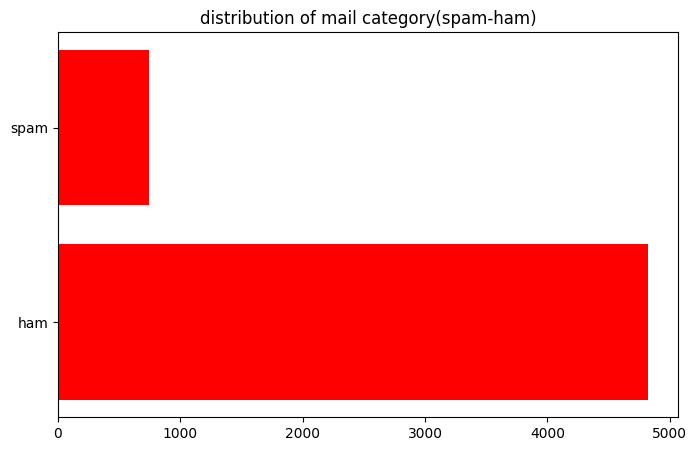

In [ ]:
z = df['Category'].value_counts()

plt.figure(figsize=(8,5))
plt.barh(z.index, z.values ,color = 'red')
plt.title('distribution of mail category(spam-ham)')
plt.show()

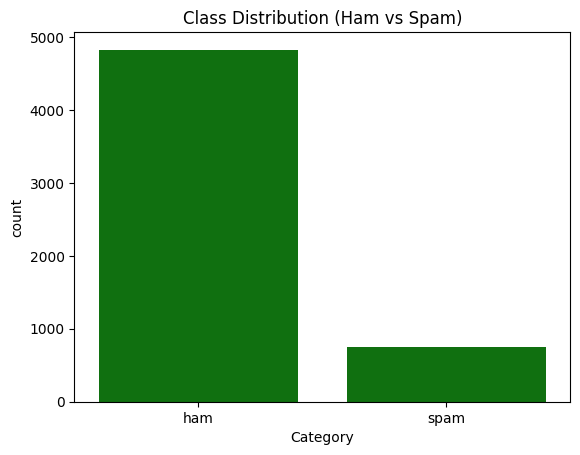

In [ ]:
# Class distribution plot
sns.countplot(x=df['Category'], color = 'green')
plt.title("Class Distribution (Ham vs Spam)")
plt.show()

## label encoding

> Add blockquote



In [ ]:
print(mail_df.columns)


Index(['Category', 'Message'], dtype='object')


In [ ]:
print(mail_df['Category'].unique())


['ham' 'spam']


In [ ]:
# label spam as 0, ham ails as 1
mail_df['Category'] = mail_df['Category'].map({'spam': 0, 'ham': 1})


In [ ]:
# seperatng the data as text and label
x = mail_df['Message']
y = mail_df['Category']

In [ ]:
y

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


## splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32, stratify=y)

In [ ]:
print(x.shape),
print(x_train.shape)

(5572,)
(4457,)


## feature extraction

In [ ]:
# transform the text data to feature vectors that can be used as input in the logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english',lowercase = True, ngram_range=(1,2))

In [ ]:
x_train_f = feature_extraction.fit_transform(x_train)
x_test_f = feature_extraction.transform(x_test)

In [ ]:
y_test.dtypes

dtype('int64')

In [ ]:
# convert y_train and y_test values as integer
y_train = y_train.astype('int')
y_test  = y_test.astype('int')

In [ ]:
print(x_train)

2572    … and don‘t worry we‘ll have finished by march...
1881    Just seeing your missed call my dear brother. ...
1733                          K, can that happen tonight?
5437                         Am slow in using biola's fne
2213    This is one of the days you have a billion cla...
                              ...                        
1268     SERIOUSLY. TELL HER THOSE EXACT WORDS RIGHT NOW.
5377    The current leading bid is 151. To pause this ...
1759                                Sorry i'm not free...
396     From here after The performance award is calcu...
5383    Good day to You too.Pray for me.Remove the tee...
Name: Message, Length: 4457, dtype: object


In [ ]:
# tranning the ml model
model = LogisticRegression(max_iter = 1000, class_weight='balanced')
model.fit(x_train_f,y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# prediction on training data
pred_on_train = model.predict(x_train_f)
accuracy_on_train = accuracy_score(pred_on_train, y_train)
print('Accuracy score:', accuracy_on_train)

Accuracy score: 0.9977563383441777


In [ ]:
# prediction on test data
pred_on_test = model.predict(x_test_f)
accuracy_on_test = accuracy_score(pred_on_test, y_test)
print('Accuracy score:', accuracy_on_test)

Accuracy score: 0.9910313901345291


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test_f)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[144   5]
 [  5 961]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       149
           1       0.99      0.99      0.99       966

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



Building a predictive system


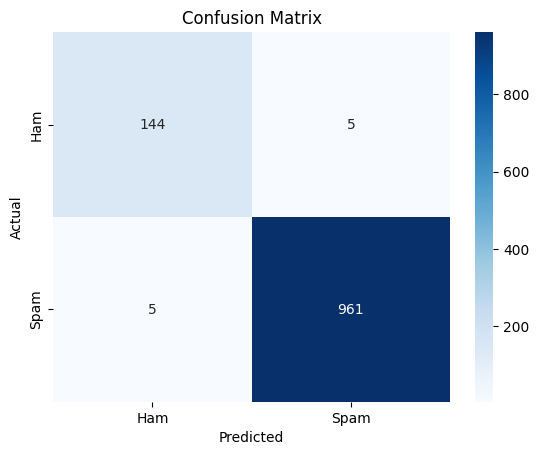

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Ham', 'Spam'],
yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model, "spam_model.pkl")
joblib.dump(feature_extraction, "vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [ ]:
import joblib

# Load artifacts
model = joblib.load("spam_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

def predict_email(text: str) -> str:
    features = vectorizer.transform([text])
    prediction = model.predict(features)[0]
    return "Spam" if prediction == 0 else "Ham"


In [ ]:
input_mail = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

In [ ]:
# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Define prediction function
def predict_email(features):
    prediction = model.predict(features)[0]   # take first element
    label = 'Spam' if prediction == 0 else 'Ham'
    return label

# Make a prediction
print("Sample prediction:", predict_email(input_data_features))


Sample prediction: Ham
